In [ ]:
# running the algorithm

In [2]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
import network as network

In [3]:
# importing MNIST dataset
(train_x, train_y), (test_x, test_y) = mnist.load_data()

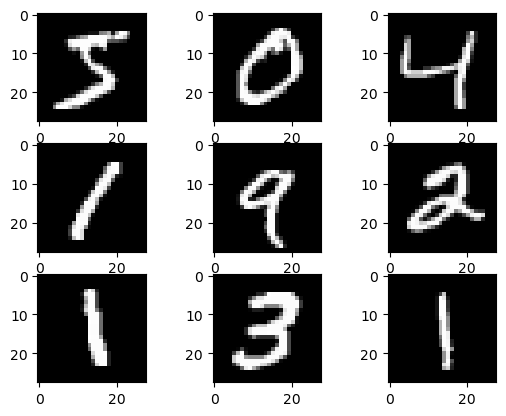

In [4]:
# plotting some of the digits
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.show

In [5]:
print(train_x.shape)

(60000, 28, 28)


In [6]:
# flattening and normalizing the input
train_x_reshape = np.reshape(train_x, (60000, 28*28))
train_x_reshape = train_x_reshape / np.amax(train_x_reshape)

In [7]:
print(train_x_reshape.shape)

(60000, 784)


In [26]:
# initializing the network
hebb = network.Hebb_Network(n_input=784, n_output=4, training_steps=5, p=0.25)

In [27]:
# include number of examples into code of network somehow!

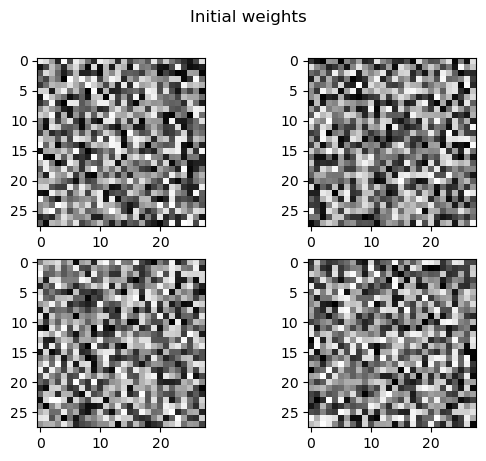

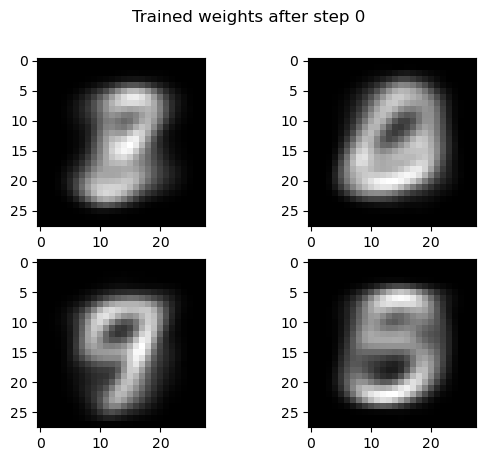

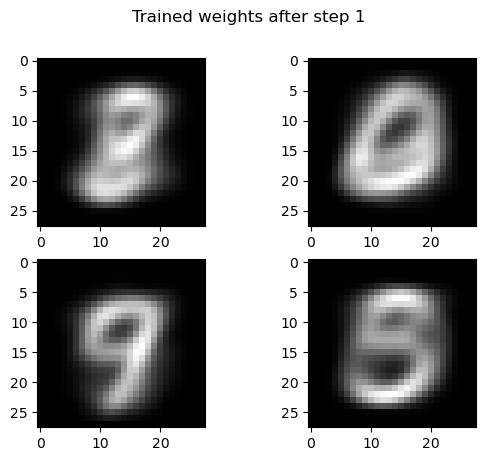

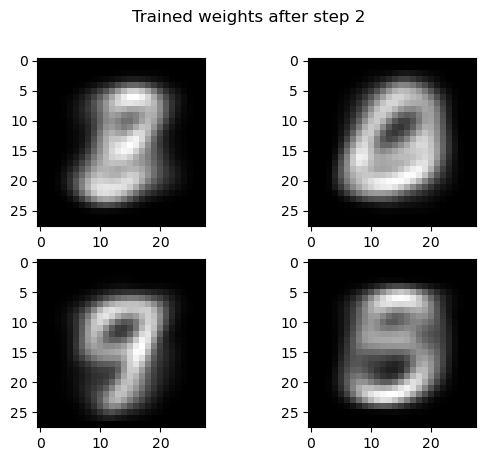

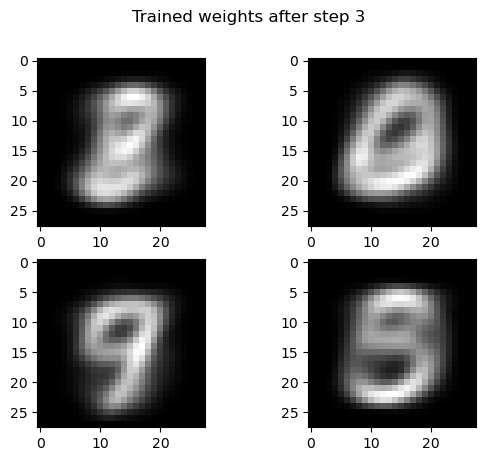

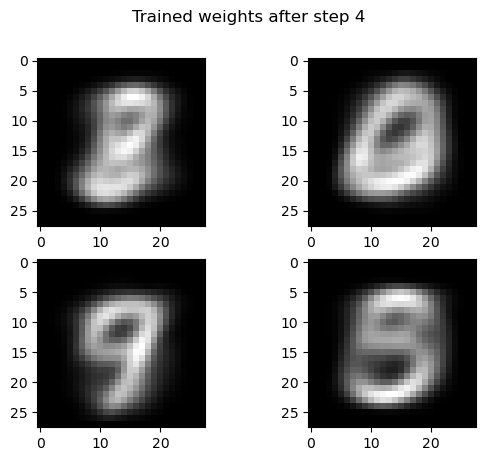

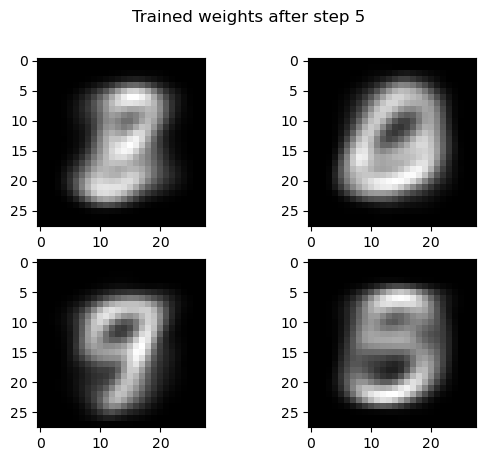

In [28]:
# training the network
hebb.train(train_x_reshape, vis_step=1)

In [29]:
# functions for testing the representational units
def create_single_digit_set(digit, train_x=train_x_reshape, train_y=train_y):
    single_digit_array = train_x[train_y==digit]
    return single_digit_array

def test_coding(network, data, n_output):
    outputs = np.zeros((data.shape[0], n_output))
    # send single digits through network via predict, don't forget to recast them!
    for i in range(data.shape[0]):
        digit = data[i, :]
        digit = digit[:, np.newaxis]
        output = network.predict(digit)
        output = output.T
        # save outputs
        outputs[i, :] = output
    # compute mean output over all predictions
    outputs_mean = np.mean(outputs, axis=0)
    return outputs_mean    

In [30]:
# creating mean output vectors
for i in range(10):
    digits = create_single_digit_set(i)
    output = test_coding(hebb, digits, 4)
    print(f"Mean vector for digit {i}:")
    print(output)
    print("_____________________________________________________________")

Mean vector for digit 0:
[0.10839102 0.64950194 0.15633969 0.73746412]
_____________________________________________________________
Mean vector for digit 1:
[0.16211807 0.00103827 0.00563631 0.00400475]
_____________________________________________________________
Mean vector for digit 2:
[0.55219872 0.46341054 0.06881504 0.15424639]
_____________________________________________________________
Mean vector for digit 3:
[0.34268472 0.04746371 0.14597945 0.71342359]
_____________________________________________________________
Mean vector for digit 4:
[0.04741527 0.28158165 0.47295447 0.02482027]
_____________________________________________________________
Mean vector for digit 5:
[0.15753551 0.07028224 0.17727357 0.51263605]
_____________________________________________________________
Mean vector for digit 6:
[0.26884082 0.68063535 0.07282866 0.06623859]
_____________________________________________________________
Mean vector for digit 7:
[0.07533919 0.03415802 0.54652833 0.0339984 

In [31]:
# amounts of every digit in data set:
for i in range(10):
    digits = create_single_digit_set(i)
    print(f"{i} ::: {digits.shape[0]}")

0 ::: 5923
1 ::: 6742
2 ::: 5958
3 ::: 6131
4 ::: 5842
5 ::: 5421
6 ::: 5918
7 ::: 6265
8 ::: 5851
9 ::: 5949


In [32]:
# creating multiple example output vectors for every digit
for i in range(10):
    digits = create_single_digit_set(i)
    rng = np.random.default_rng()
    sample_digit = rng.choice(digits, 5)
    print(f"Example output vectors for digit {i}")
    for j in range(sample_digit.shape[0]):
        digit = sample_digit[j, :]
        digit = digit[:, np.newaxis]
        output_vector = hebb.predict(digit)
        output_vector = output_vector.T
        print(f"{output_vector}")
    print("------------------------------------")

Example output vectors for digit 0
[[0. 0. 0. 1.]]
[[0. 1. 0. 1.]]
[[0. 1. 0. 1.]]
[[0. 1. 0. 1.]]
[[0. 1. 0. 1.]]
------------------------------------
Example output vectors for digit 1
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
------------------------------------
Example output vectors for digit 2
[[1. 1. 0. 0.]]
[[1. 0. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
------------------------------------
Example output vectors for digit 3
[[1. 1. 0. 1.]]
[[1. 0. 1. 1.]]
[[1. 0. 0. 1.]]
[[0. 0. 1. 0.]]
[[0. 0. 0. 1.]]
------------------------------------
Example output vectors for digit 4
[[0. 0. 1. 0.]]
[[0. 1. 0. 0.]]
[[0. 0. 1. 0.]]
[[0. 1. 1. 0.]]
[[0. 0. 0. 0.]]
------------------------------------
Example output vectors for digit 5
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 1. 1.]]
[[0. 0. 0. 0.]]
------------------------------------
Example output vectors for digit 6
[[0. 0. 0. 0.]]
[[0. 1. 0. 0.]]
[[1. 1. 0. 0.]]
[[0. 

In [33]:
print(test_x.shape)

(10000, 28, 28)


In [34]:
# flattening and normalizing the test data set
test_x_reshape = np.reshape(test_x, (10000, 28*28))
test_x_reshape = test_x_reshape / np.amax(test_x_reshape)

In [35]:
# creating mean output vectors for the test data set
for i in range(10):
    digits = create_single_digit_set(i, train_x=test_x_reshape, train_y=test_y)
    output = test_coding(hebb, digits, 4)
    print(f"Mean vector for digit {i}:")
    print(output)
    print("_____________________________________________________________")

Mean vector for digit 0:
[0.09591837 0.6744898  0.15204082 0.73163265]
_____________________________________________________________
Mean vector for digit 1:
[0.17180617 0.00088106 0.00528634 0.00440529]
_____________________________________________________________
Mean vector for digit 2:
[0.60755814 0.43992248 0.07267442 0.17926357]
_____________________________________________________________
Mean vector for digit 3:
[0.36534653 0.04950495 0.16930693 0.74554455]
_____________________________________________________________
Mean vector for digit 4:
[0.06008147 0.26782077 0.50712831 0.02342159]
_____________________________________________________________
Mean vector for digit 5:
[0.19394619 0.0706278  0.20852018 0.53923767]
_____________________________________________________________
Mean vector for digit 6:
[0.25365344 0.7473904  0.10020877 0.0782881 ]
_____________________________________________________________
Mean vector for digit 7:
[0.09435798 0.03599222 0.55058366 0.03501946

In [36]:
# creating multiple example output vectors for the test data set
for i in range(10):
    digits = create_single_digit_set(i, train_x=test_x_reshape, train_y=test_y)
    rng = np.random.default_rng()
    sample_digit = rng.choice(digits, 5)
    print(f"Example output vectors for digit {i}")
    for j in range(sample_digit.shape[0]):
        digit = sample_digit[j, :]
        digit = digit[:, np.newaxis]
        output_vector = hebb.predict(digit)
        output_vector = output_vector.T
        print(f"{output_vector}")
    print("------------------------------------")

Example output vectors for digit 0
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 1. 0. 1.]]
[[0. 0. 0. 1.]]
------------------------------------
Example output vectors for digit 1
[[0. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[1. 0. 0. 0.]]
------------------------------------
Example output vectors for digit 2
[[1. 1. 0. 0.]]
[[1. 1. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 1. 0. 0.]]
------------------------------------
Example output vectors for digit 3
[[1. 0. 1. 1.]]
[[1. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 0.]]
[[1. 0. 1. 1.]]
------------------------------------
Example output vectors for digit 4
[[0. 0. 1. 0.]]
[[0. 1. 1. 0.]]
[[0. 0. 0. 0.]]
[[0. 1. 1. 0.]]
[[0. 0. 1. 0.]]
------------------------------------
Example output vectors for digit 5
[[0. 0. 0. 0.]]
[[0. 0. 0. 1.]]
[[1. 0. 0. 0.]]
[[0. 1. 0. 1.]]
[[0. 0. 0. 1.]]
------------------------------------
Example output vectors for digit 6
[[1. 0. 0. 0.]]
[[1. 1. 1. 1.]]
[[0. 1. 0. 0.]]
[[0. 

In [37]:
# creating example vectors for the test data set
for i in range(10):
    digits = create_single_digit_set(i, train_x=test_x_reshape, train_y=test_y)
    rng = np.random.default_rng()
    sample_digit = rng.choice(digits, 1)
    sample_digit = sample_digit.T
    output_vector = hebb.predict(sample_digit)
    output_vector = output_vector.T
    print(f"{i} ::: {output_vector}")

0 ::: [[0. 1. 0. 0.]]
1 ::: [[0. 0. 0. 0.]]
2 ::: [[1. 0. 0. 1.]]
3 ::: [[1. 0. 0. 0.]]
4 ::: [[0. 1. 0. 0.]]
5 ::: [[0. 0. 1. 0.]]
6 ::: [[0. 1. 0. 0.]]
7 ::: [[0. 0. 1. 0.]]
8 ::: [[1. 0. 1. 1.]]
9 ::: [[0. 0. 1. 0.]]
